<a href="https://colab.research.google.com/github/vbloise3/Data_Science/blob/master/WorkingWithData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

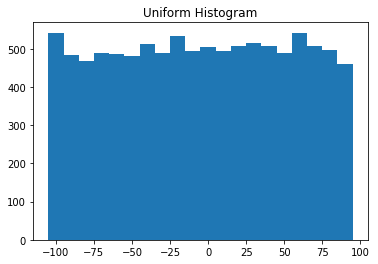

In [5]:
from typing import List , Dict 
from collections import Counter 
import math 
import matplotlib.pyplot as plt 
import random 

def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

def inverse_normal_cdf(p: float,
                       mu: float = 0,
                       sigma: float = 1,
                       tolerance: float = 0.00001) -> float:
    """Find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z = -10.0                      # normal_cdf(-10) is (very close to) 0
    hi_z  =  10.0                      # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # Consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            low_z = mid_z              # Midpoint too low, search above it
        else:
            hi_z = mid_z               # Midpoint too high, search below it

    return mid_z

def bucketize( point: float, bucket_size: float)-> float: 
  """ Floor the point to the next lower multiple of bucket_size""" 
  return bucket_size * math.floor( point / bucket_size)

def make_histogram( points: List[ float], bucket_size: float)-> Dict[ float, int]: 
  """ Buckets the points and counts how many in each bucket""" 
  return Counter( bucketize( point, bucket_size) for point in points)

def plot_histogram( points: List[ float], bucket_size: float, title: str = ""): 
  histogram = make_histogram( points, bucket_size) 
  plt.bar( histogram.keys(), histogram.values(), width = bucket_size) 
  plt.title( title)

random.seed( 0)
# uniform between-100 and 100 
uniform = [200 * random.random()-100 for _ in range( 10000)]
# normal distribution with mean 0, standard deviation 57 
normal = [57 * inverse_normal_cdf( random.random()) for _ in range( 10000)]

plot_histogram( uniform, 10, "Uniform Histogram")
